In [1]:
import os
import pandas as pd

# Define the folder containing the dataset
folder_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\01-12"

# Define TLS-related ports and Protocol (TCP = 6)
tls_ports = [443, 993, 995, 8443]
protocol_value = 6  # TCP

# Define chunk size for large files
chunk_size = 100000  # 100k rows per chunk
large_file_threshold = 1.5 * (1024  3)  # 1.5GB in bytes

# List to store TLS traffic DataFrames
tls_attacks_list = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if it's a CSV file
    if file_name.endswith(".csv"):
        file_size = os.path.getsize(file_path)

        print(f"Processing: {file_name} | Size: {round(file_size / (1024  3), 2)} GB")
        
        if file_size > large_file_threshold:
            # Process large files in chunks
            print(f" {file_name} is large. Processing in chunks...")
            for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
                tls_chunk = chunk[(chunk[' Destination Port'].isin(tls_ports))]
                if not tls_chunk.empty:
                    tls_attacks_list.append(tls_chunk)
        else:
            # Process small files normally
            df = pd.read_csv(file_path, low_memory=False)
            tls_attacks = df[(df[' Destination Port'].isin(tls_ports))]
            if not tls_attacks.empty:
                tls_attacks_list.append(tls_attacks)


combined_tls_attacks = pd.concat(tls_attacks_list, ignore_index=True)

# Save the final dataset
output_path = os.path.join("E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_01_12.csv")
combined_tls_attacks.to_csv(output_path, index=False)

print(f"\n Final TLS attack dataset saved at: {output_path}")
print("TLS Attack Class Distribution:\n", combined_tls_attacks[' Label'].value_counts())

Processing: DrDoS_DNS.csv | Size: 1.99 GB
 DrDoS_DNS.csv is large. Processing in chunks...
Processing: DrDoS_LDAP.csv | Size: 0.85 GB
Processing: DrDoS_MSSQL.csv | Size: 1.76 GB
 DrDoS_MSSQL.csv is large. Processing in chunks...
Processing: DrDoS_NetBIOS.csv | Size: 1.58 GB
 DrDoS_NetBIOS.csv is large. Processing in chunks...
Processing: DrDoS_NTP.csv | Size: 0.6 GB
Processing: DrDoS_SNMP.csv | Size: 2.02 GB
 DrDoS_SNMP.csv is large. Processing in chunks...
Processing: DrDoS_SSDP.csv | Size: 1.17 GB
Processing: DrDoS_UDP.csv | Size: 1.4 GB
Processing: Syn.csv | Size: 0.59 GB
Processing: TFTP.csv | Size: 8.66 GB
 TFTP.csv is large. Processing in chunks...
Processing: UDPLag.csv | Size: 0.15 GB

 Final TLS attack dataset saved at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CIC-DDoS2019\TLS_Traffic_Dataset\TLS_Combined_Attacks_01_12.csv
TLS Attack Class Distribution:
 BENIGN           15225
TFTP              1163
DrDoS_SNMP         337
DrDoS_DNS          326
DrDoS_MSSQL    

In [2]:
import os
import pandas as pd

# Define the new folder containing CICDDoS2019 dataset
folder_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\03-11"

# Define TLS-related ports and Protocol (TCP = 6)
tls_ports = [443, 993, 995, 8443]

# Define chunk size for large files
chunk_size = 100000  # 100k rows per chunk
large_file_threshold = 1.5 * (1024  3)  # 1.5GB in bytes

# List to store TLS traffic DataFrames
tls_attacks_list = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if it's a CSV file
    if file_name.endswith(".csv"):
        file_size = os.path.getsize(file_path)

        print(f"Processing: {file_name} | Size: {round(file_size / (1024  3), 2)} GB")
        
        if file_size > large_file_threshold:
            # Process large files in chunks
            print(f" {file_name} is large. Processing in chunks...")
            for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
                tls_chunk = chunk[(chunk[' Destination Port'].isin(tls_ports))]
                if not tls_chunk.empty:
                    tls_attacks_list.append(tls_chunk)
        else:
            # Process small files normally
            df = pd.read_csv(file_path, low_memory=False)
            tls_attacks = df[(df[' Destination Port'].isin(tls_ports))]
            if not tls_attacks.empty:
                tls_attacks_list.append(tls_attacks)

combined_tls_attacks = pd.concat(tls_attacks_list, ignore_index=True)

# Save the final dataset
output_path = os.path.join("E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_03_11.csv")
combined_tls_attacks.to_csv(output_path, index=False)

print(f"\n Final TLS attack dataset saved at: {output_path}")
print("TLS Attack Class Distribution:\n", combined_tls_attacks[' Label'].value_counts())

Processing: LDAP.csv | Size: 0.81 GB
Processing: MSSQL.csv | Size: 2.22 GB
 MSSQL.csv is large. Processing in chunks...
Processing: NetBIOS.csv | Size: 1.32 GB
Processing: Portmap.csv | Size: 0.07 GB
Processing: Syn.csv | Size: 1.75 GB
 Syn.csv is large. Processing in chunks...
Processing: UDP.csv | Size: 1.67 GB
 UDP.csv is large. Processing in chunks...
Processing: UDPLag.csv | Size: 0.3 GB

 Final TLS attack dataset saved at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CIC-DDoS2019\TLS_Traffic_Dataset\TLS_Combined_Attacks_03_11.csv
TLS Attack Class Distribution:
 BENIGN     21500
MSSQL        355
Syn          335
NetBIOS      245
LDAP         119
UDP           59
Portmap       20
Name:  Label, dtype: int64


Merged dataset saved successfully at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CIC-DDoS2019\TLS_Traffic_Dataset\TLS_Merged_Attacks_Final.csv
Final dataset shape: (40606, 88)


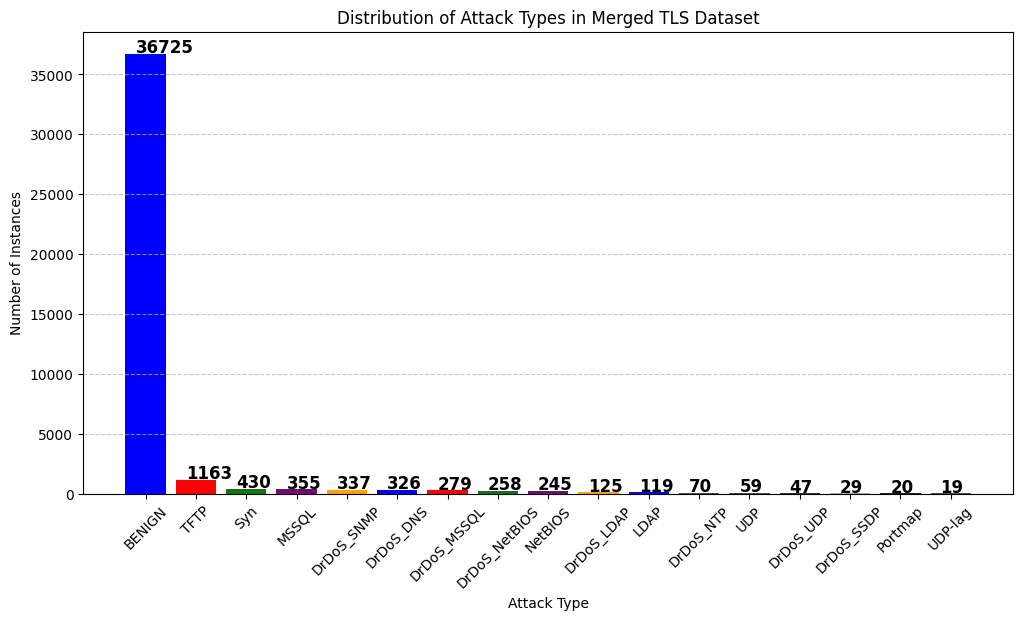

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
file_path_01_12 = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_01_12.csv"
file_path_03_11 = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_03_11.csv"

df_01_12 = pd.read_csv(file_path_01_12, low_memory=False)
df_03_11 = pd.read_csv(file_path_03_11, low_memory=False)

# Merge the datasets
merged_df = pd.concat([df_01_12, df_03_11], ignore_index=True)

# Save the merged dataset
output_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Merged_Attacks_Final.csv"
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved successfully at: {output_path}")
print("Final dataset shape:", merged_df.shape)

# Plot Attack Type Distribution with Value Labels
plt.figure(figsize=(12, 6))
attack_counts = merged_df[' Label'].value_counts()
bars = plt.bar(attack_counts.index, attack_counts.values, color=['blue', 'red', 'green', 'purple', 'orange'])

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 100, 
             str(bar.get_height()), fontsize=12, fontweight='bold')

plt.xlabel("Attack Type")
plt.ylabel("Number of Instances")
plt.title("Distribution of Attack Types in Merged TLS Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Dataset
df = pd.read_csv("E:\\TLS_Merged_Attacks_Final.csv", low_memory=False).drop(columns=["Flow ID", " Source IP", " Destination IP"], errors="ignore")

# Keep Relevant Attack Types
df[" Label"] = df[" Label"].str.strip()
df = df[df[" Label"].isin(["Syn", "LDAP", "DrDoS_DNS", "DrDoS_LDAP", "BENIGN"])]

# Handle Missing and Infinite Values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Separate Features and Labels
df_numeric = df.drop(columns=[" Timestamp", " Label"], errors="ignore")
df_timestamps, y = df[" Timestamp"], df[" Label"]

# Standardize Features
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Apply KMeans Clustering & SMOTE
df_numeric_scaled["Cluster"] = KMeans(n_clusters=20, random_state=42, n_init=10).fit_predict(df_numeric_scaled)
X_resampled, y_resampled = KMeansSMOTE(k_neighbors=5, cluster_balance_threshold=0.01, random_state=42).fit_resample(df_numeric_scaled.drop(columns=["Cluster"]), y)

# Restore Original Scale & Handle Timestamp Oversampling
balanced_df = pd.DataFrame(scaler.inverse_transform(X_resampled), columns=df_numeric.columns)
balanced_df[" Timestamp"], balanced_df[" Label"] = np.random.choice(df_timestamps, len(y_resampled), replace=True), y_resampled

# Ensure BENIGN Matches Largest Class
attack_size = balanced_df[" Label"].value_counts().max()
benign_sampled = df[df[" Label"] == "BENIGN"].sample(n=attack_size * 2, replace=True, random_state=42)
final_balanced_df = pd.concat([balanced_df[balanced_df[" Label"] != "BENIGN"], benign_sampled.iloc[:attack_size]], ignore_index=True)

# Save Final Dataset
output_path = "E:\\TLS_Balanced_Attacks_Fixed.csv"
final_balanced_df.to_csv(output_path, index=False)

print(f"Fully Balanced TLS dataset saved successfully at: {output_path}")
print("New Class Distribution:\n", final_balanced_df[" Label"].value_counts())

Fully Balanced TLS dataset saved successfully at: E:\TLS_Balanced_Attacks_Fixed.csv
New Class Distribution:
 Syn           35807
BENIGN        35807
DrDoS_DNS     35806
DrDoS_LDAP    35806
LDAP          35806
Name:  Label, dtype: int64


In [ ]:
from scipy.stats import ks_2samp

# Ensure Column Names are Consistent
original_numeric.columns = original_numeric.columns.str.strip()
generated_numeric.columns = generated_numeric.columns.str.strip()

# Find Common Features in Both Datasets
common_features = list(set(original_numeric.columns) & set(generated_numeric.columns))

ks_results = {}
for feature in common_features:  # Only test common features
    stat, p_value = ks_2samp(original_numeric[feature], generated_numeric[feature])
    ks_results[feature] = p_value

# Print Features with Low Similarity (Potential Issues)
low_similarity_features = {k: v for k, v in ks_results.items() if v < 0.05}
if low_similarity_features:
    print("Features with different distributions (p-value < 0.05):")
    print(low_similarity_features)
else:
    print("All synthetic features match real distributions (p-value > 0.05).")

⚠️ Features with different distributions (p-value < 0.05):
{'Total Length of Bwd Packets': 0.0, 'Flow IAT Std': 0.0, 'Bwd Packet Length Std': 0.0, 'Packet Length Mean': 0.0, 'Fwd IAT Total': 0.0, 'Idle Std': 0.0, 'Fwd IAT Std': 0.0, 'Bwd IAT Min': 0.0, 'Avg Fwd Segment Size': 0.0, 'Subflow Bwd Bytes': 0.0, 'Bwd Header Length': 0.0, 'Flow IAT Mean': 0.0, 'Fwd Packet Length Min': 0.0, 'Fwd IAT Min': 0.0, 'Bwd IAT Mean': 0.0, 'act_data_pkt_fwd': 0.0, 'Idle Min': 0.0, 'Source Port': 0.0, 'Avg Bwd Segment Size': 0.0, 'Destination Port': 0.0, 'URG Flag Count': 0.0, 'Packet Length Std': 0.0, 'Bwd Packet Length Min': 4.5474830562693936e-66, 'Bwd IAT Total': 0.0, 'Packet Length Variance': 0.0, 'Init_Win_bytes_backward': 0.0, 'Protocol': 0.0, 'Fwd Packet Length Mean': 0.0, 'Fwd PSH Flags': 0.0, 'CWE Flag Count': 1.0654584860956187e-169, 'Active Mean': 0.0, 'Subflow Fwd Bytes': 0.0, 'Flow IAT Min': 0.0, 'Subflow Fwd Packets': 0.0, 'Fwd IAT Mean': 0.0, 'Bwd Packets/s': 0.0, 'Flow Packets/s': 0.0, 

In [1]:
import pandas as pd
import random
import time
from scapy.all import Ether, IP, TCP, UDP, Raw, wrpcap

# Load dataset and fix column names
file_path = "E:\\TLS_Balanced_Attacks_Fixed.csv"  # Update with actual path
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Remove spaces from column names

# Define output PCAP file
pcap_output = "E:\\network_traffic.pcap"
packets = []

# Generate random MAC addresses
def random_mac():
    return ":".join(f"{random.randint(0, 255):02x}" for _ in range(6))

# Process each row to construct packets
for _, row in df.iterrows():
    try:
        src_port = int(row['Source Port'])
        dst_port = int(row['Destination Port'])
        protocol = int(row['Protocol'])
        packet_size = int(row['Total Length of Fwd Packets'])
        timestamp = row['Timestamp'] if 'Timestamp' in df.columns else None

        # Generate realistic IPs
        src_ip = f"192.168.1.{random.randint(2, 254)}"
        dst_ip = f"192.168.1.{random.randint(2, 254)}"

        # Generate MAC addresses
        src_mac = random_mac()
        dst_mac = random_mac()

        # Construct Ethernet layer with proper MAC addresses
        eth_layer = Ether(src=src_mac, dst=dst_mac)

        # Construct IP layer
        ip_layer = IP(src=src_ip, dst=dst_ip)

        # Construct Transport layer (TCP/UDP)
        if protocol == 6:  # TCP
            transport_layer = TCP(sport=src_port, dport=dst_port, flags="S")  # SYN flag
        elif protocol == 17:  # UDP
            transport_layer = UDP(sport=src_port, dport=dst_port)
        else:
            continue  # Skip unsupported protocols

        # Create payload with variable size
        payload = Raw(load=b'A' * min(packet_size, 1500))  # Limit to 1500 bytes (MTU constraint)

        # Construct full packet
        packet = eth_layer / ip_layer / transport_layer / payload

        # Assign timestamp if available
        if timestamp:
            packet.time = time.mktime(pd.to_datetime(timestamp).timetuple())

        packets.append(packet)

    except Exception as e:
        print(f"Error processing row: {e}")
        continue

# Save to PCAP
wrpcap(pcap_output, packets)
print(f"Realistic PCAP file saved as: {pcap_output}")

Realistic PCAP file saved as: E:\network_traffic.pcap
